In [4]:
import torch
from matplotlib import pyplot as plt
import sys 
sys.path.insert(1, './src')
from util import MMD, median_distance

torch.manual_seed(987)
# device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from cometitors import run_rkl_wgf
from cometitors import run_mmdgf

In [5]:
from torch.distributions import MultivariateNormal as MVN
from run_tsm import run_ntkNGD

d = 2
print(f"Data {d} dimension")

Sigma = torch.eye(d, device=device) * 0.25
def gendata(n = 100):
    x = MVN(torch.ones(d, device=device) * 2, Sigma).sample((n,))
    
    return x[:n, :]
    

Data 2 dimension


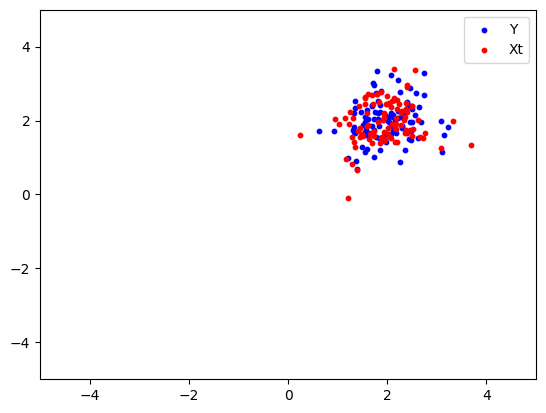

100%|██████████| 100/100 [00:12<00:00,  8.14it/s]


In [6]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
x1 = gendata() 
x0 = torch.randn_like(x1)
    
def callback(x1, xt):
    clear_output(wait=True)
    plt.scatter(x1[:, 0].cpu(), x1[:, 1].cpu(), c='b', s=10, label='Y')
    plt.scatter(xt[:, 0].cpu(), xt[:, 1].cpu(), c='r', s=10, label='Xt')
    plt.legend()
    plt.xlim(-5, 5); plt.ylim(-5, 5)
    plt.show()
    return None

xt, xt_traj = run_ntkNGD(x1, x0.clone(), None, 1e-1, None, 100, 'ntkNGD', kern ='rbf', callback = callback)
